# Outliers in Murder Accountability Project

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from sklearn import preprocessing

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [3]:
COLORS = {
    'Sex': ['pink', 'b', 'w'],
    'Solved': ['r', 'b'],
    'Source': ['g', 'b'],
}

## .75 Percentile

### By Year

In [123]:
by_year_75 = map_data.groupby('Year').count().quantile(q=.75)[0]
by_year_75

20863.0

In [124]:
by_year = map_data.groupby('Year').count()['CNTYFIPS'].to_frame()
all_cases_above_p75 = by_year[by_year['CNTYFIPS']>by_year_75].copy()
all_cases_above_p75.rename(columns={'CNTYFIPS': 'all_cases_above_p75'}, inplace=True)
all_cases_above_p75

,all_cases_above_p75
Year,
1979,21698
1980,23092
1981,21208
1990,21246
1991,22657
1992,23793
1993,24337
1994,23246
1995,21194


In [125]:
by_year['below_p75'] = by_year['CNTYFIPS']
by_year.loc[by_year['below_p75'] > by_year_75, 'below_p75'] = by_year_75

#### Solved by Year

In [23]:
solved_by_year_75 = map_data[map_data['Solved']=='Yes'].groupby('Year').count().quantile(q=.75)[0]
solved_by_year_75

14906.0

In [127]:
solved_by_year = map_data[map_data['Solved']=='Yes'].groupby('Year').count()['CNTYFIPS'].to_frame()
solved_cases_above_p75 = solved_by_year[solved_by_year['CNTYFIPS']>solved_by_year_75].copy()
solved_cases_above_p75.rename(columns={'CNTYFIPS': 'solved_cases_above_p75'}, inplace=True)
solved_cases_above_p75

,solved_cases_above_p75
Year,
1978,14992
1979,16029
1980,16729
1981,15788
1982,15060
1990,15001
1991,15321
1992,15881
1993,16436


In [128]:
solved_by_year['below_p75'] = solved_by_year['CNTYFIPS']
solved_by_year.loc[solved_by_year['below_p75'] > solved_by_year_75, 'below_p75'] = solved_by_year_75

#### Unsolved by Year

In [26]:
unsolved_by_year_75 = map_data[map_data['Solved']=='No'].groupby('Year').count().quantile(q=.75)[0]
unsolved_by_year_75

5938.5

In [129]:
unsolved_by_year = map_data[map_data['Solved']=='No'].groupby('Year').count()['CNTYFIPS'].to_frame()
unsolved_cases_above_p75 = unsolved_by_year[unsolved_by_year['CNTYFIPS']>unsolved_by_year_75].copy()
unsolved_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_cases_above_p75'}, inplace=True)
unsolved_cases_above_p75

,unsolved_cases_above_p75
Year,
1980,6363
1990,6245
1991,7336
1992,7912
1993,7901
1994,7365
1995,6809
2016,6008
2017,5995


In [130]:
unsolved_by_year['below_p75'] = unsolved_by_year['CNTYFIPS']
unsolved_by_year.loc[unsolved_by_year['below_p75'] > unsolved_by_year_75, 'below_p75'] = unsolved_by_year_75

#### Visualizing

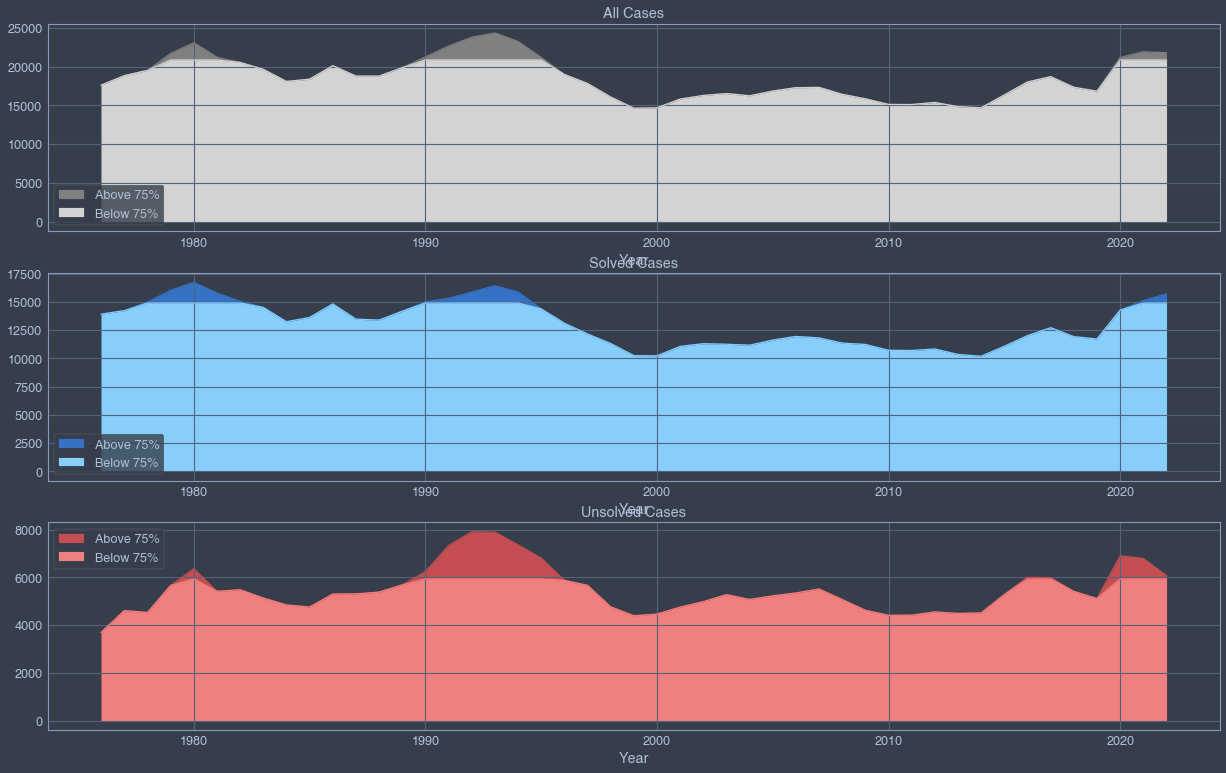

In [137]:
fig, ax = plt.subplots(3, 1, figsize=(21, 13))

by_year['CNTYFIPS'].plot(kind='area', ax=ax[0], color=['grey'], label='Above 75%')
by_year['below_p75'].plot(kind='area', ax=ax[0], color=['lightgrey'], label='Below 75%')
ax[0].set_title('All Cases')
ax[0].legend()

solved_by_year['CNTYFIPS'].plot(kind='area', ax=ax[1], color=['b'], label='Above 75%')
solved_by_year['below_p75'].plot(kind='area', ax=ax[1], color=['lightskyblue'], label='Below 75%')
ax[1].set_title('Solved Cases')
ax[1].legend()

unsolved_by_year['CNTYFIPS'].plot(kind='area', ax=ax[2], color=['r'], label='Above 75%')
unsolved_by_year['below_p75'].plot(kind='area', ax=ax[2], color=['lightcoral'], label='Below 75%')
ax[2].set_title('Unsolved Cases')
ax[2].legend()

#### Unsolved Cases with Female Victims

In [5]:
unsolved_female_by_year_75 = map_data[(map_data['Solved']=='No')
                                      & (map_data['VicSex']=='Female')].groupby('Year')\
                                                                       .count()\
                                                                       .quantile(q=.75)[0]
unsolved_female_by_year_75

1183.0

In [13]:
unsolved_female_by_year = map_data[(map_data['Solved']=='No')
                                   & (map_data['VicSex']=='Female')].groupby('Year')\
                                                                    .count()['CNTYFIPS'].to_frame()

unsolved_female_cases_above_p75 = unsolved_female_by_year[unsolved_female_by_year['CNTYFIPS']>unsolved_female_by_year_75].copy()
unsolved_female_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_female_cases_above_p75'}, inplace=True)
unsolved_female_cases_above_p75

,unsolved_female_cases_above_p75
Year,
1979,1277
1980,1379
1982,1264
1986,1202
1987,1318
1988,1196
1989,1203
1991,1337
1992,1402


In [14]:
unsolved_female_by_year['below_p75'] = unsolved_female_by_year['CNTYFIPS']
unsolved_female_by_year.loc[unsolved_female_by_year['below_p75']
                            > unsolved_female_by_year_75, 'below_p75'] = unsolved_female_by_year_75

#### Unsolved Cases with Male Victims

In [16]:
unsolved_male_by_year_75 = map_data[(map_data['Solved']=='No')
                                    & (map_data['VicSex']=='Male')].groupby('Year')\
                                                                   .count()\
                                                                   .quantile(q=.75)[0]
unsolved_male_by_year_75

4892.5

In [17]:
unsolved_male_by_year = map_data[(map_data['Solved']=='No')
                                   & (map_data['VicSex']=='Male')].groupby('Year')\
                                                                  .count()['CNTYFIPS'].to_frame()

unsolved_male_cases_above_p75 = unsolved_male_by_year[unsolved_male_by_year['CNTYFIPS']>unsolved_male_by_year_75].copy()
unsolved_male_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_male_cases_above_p75'}, inplace=True)
unsolved_male_cases_above_p75

,unsolved_male_cases_above_p75
Year,
1980,4967
1990,5092
1991,5971
1992,6489
1993,6509
1994,6117
1995,5488
2016,5296
2017,5266


In [18]:
unsolved_male_by_year['below_p75'] = unsolved_male_by_year['CNTYFIPS']
unsolved_male_by_year.loc[unsolved_male_by_year['below_p75']
                          > unsolved_male_by_year_75, 'below_p75'] = unsolved_male_by_year_75

#### Visualizing

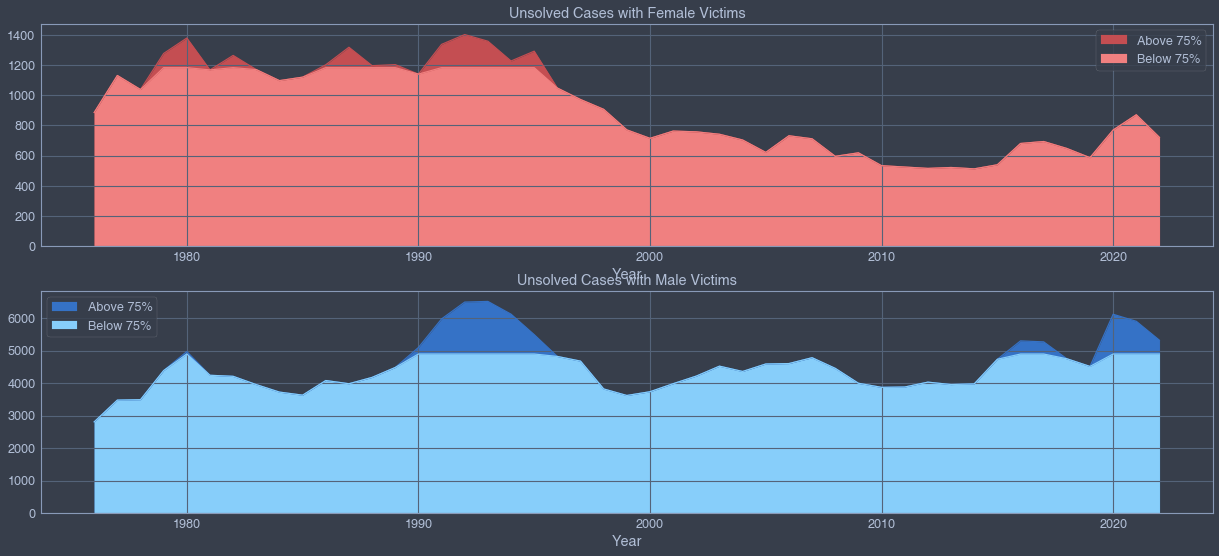

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(21, 9))

unsolved_female_by_year['CNTYFIPS'].plot(kind='area', ax=ax[0], color=['r'], label='Above 75%')
unsolved_female_by_year['below_p75'].plot(kind='area', ax=ax[0], color=['lightcoral'], label='Below 75%')
ax[0].set_title('Unsolved Cases with Female Victims')
ax[0].legend()

unsolved_male_by_year['CNTYFIPS'].plot(kind='area', ax=ax[1], color=['b'], label='Above 75%')
unsolved_male_by_year['below_p75'].plot(kind='area', ax=ax[1], color=['lightskyblue'], label='Below 75%')
ax[1].set_title('Unsolved Cases with Male Victims')
ax[1].legend()

### By Year and State 

In [21]:
year_state = map_data[(map_data['Solved']=='No')
                     & (map_data['VicSex']=='Female')].groupby(['State', 'Year']).count()['CNTYFIPS'].to_frame()
year_state.head()

CNTYFIPS
State   Year          
Alabama 1976        14
        1977        21
        1978         8
        1979        17
        1980        20

In [22]:
year_state_75 = year_state.groupby(level=0).quantile(q=.75)['CNTYFIPS'].to_frame()
year_state_75

,CNTYFIPS
State,
Alabama,21.75
Alaska,4.00
Arizona,23.00
Arkansas,10.00
California,182.50
Colorado,14.50
Connecticut,9.00
Delaware,3.00
District of Columbia,18.50


In [23]:
year_state_pv = year_state.copy()
year_state_pv = pd.pivot_table(year_state_pv, index='Year', columns='State', values='CNTYFIPS')
year_state_pv.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1976,14.0,1.0,12.0,1.0,150.0,13.0,5.0,4.0,13.0,34.0,...,NaN,18.0,44.0,4.0,1.0,14.0,10.0,3.0,15.0,NaN
1977,21.0,7.0,15.0,2.0,225.0,13.0,12.0,2.0,7.0,55.0,...,NaN,18.0,73.0,3.0,NaN,17.0,13.0,3.0,3.0,NaN
1978,8.0,NaN,17.0,7.0,172.0,15.0,8.0,1.0,8.0,65.0,...,NaN,10.0,70.0,3.0,NaN,18.0,18.0,4.0,5.0,NaN
1979,17.0,10.0,15.0,3.0,207.0,19.0,6.0,1.0,18.0,75.0,...,1.0,11.0,115.0,4.0,NaN,17.0,13.0,5.0,9.0,1.0
1980,20.0,3.0,23.0,13.0,260.0,22.0,9.0,1.0,20.0,118.0,...,NaN,12.0,97.0,6.0,NaN,17.0,18.0,2.0,14.0,1.0


In [24]:
year_state_vis = year_state_pv.copy()

In [25]:
year_state_vis = year_state_vis.loc[:, year_state_vis.columns.to_list()] > year_state_75['CNTYFIPS'].to_list()
year_state_vis = year_state_vis.astype(int)
year_state_vis.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1976,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1977,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1980,0,0,0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [26]:
year_state_vis_pv = pd.pivot_table(year_state_vis.stack().to_frame(), index='State', columns='Year')
year_state_vis_pv.columns = year_state_vis_pv.columns.droplevel()
year_state_vis_pv.head()

Year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
Alaska,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Arizona,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arkansas,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
California,0,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
flag = True
for state in year_state_vis_pv.index.to_list():
    for i in range(0, 40):
        if sum(year_state_vis_pv.loc[state].to_list()[i:i+7]) >= 7:
            if flag:
                print(state, year_state_vis_pv.columns[i])
                flag = False
                continue
            flag = True

Alabama 1991
Florida 1981
Illinois 1977
Michigan 1981
New York 1988
Texas 1985
Texas 1987


In [24]:
# Female and Male victims
# California 1990-1997
# District of Columbia 1987-1995
# New York 1987-1994
# Virginia 1990-1997

# Female victims only
# Alabama 1991-1997
# New York 1987-1995
# Texas 1985-1993

#### Visualization

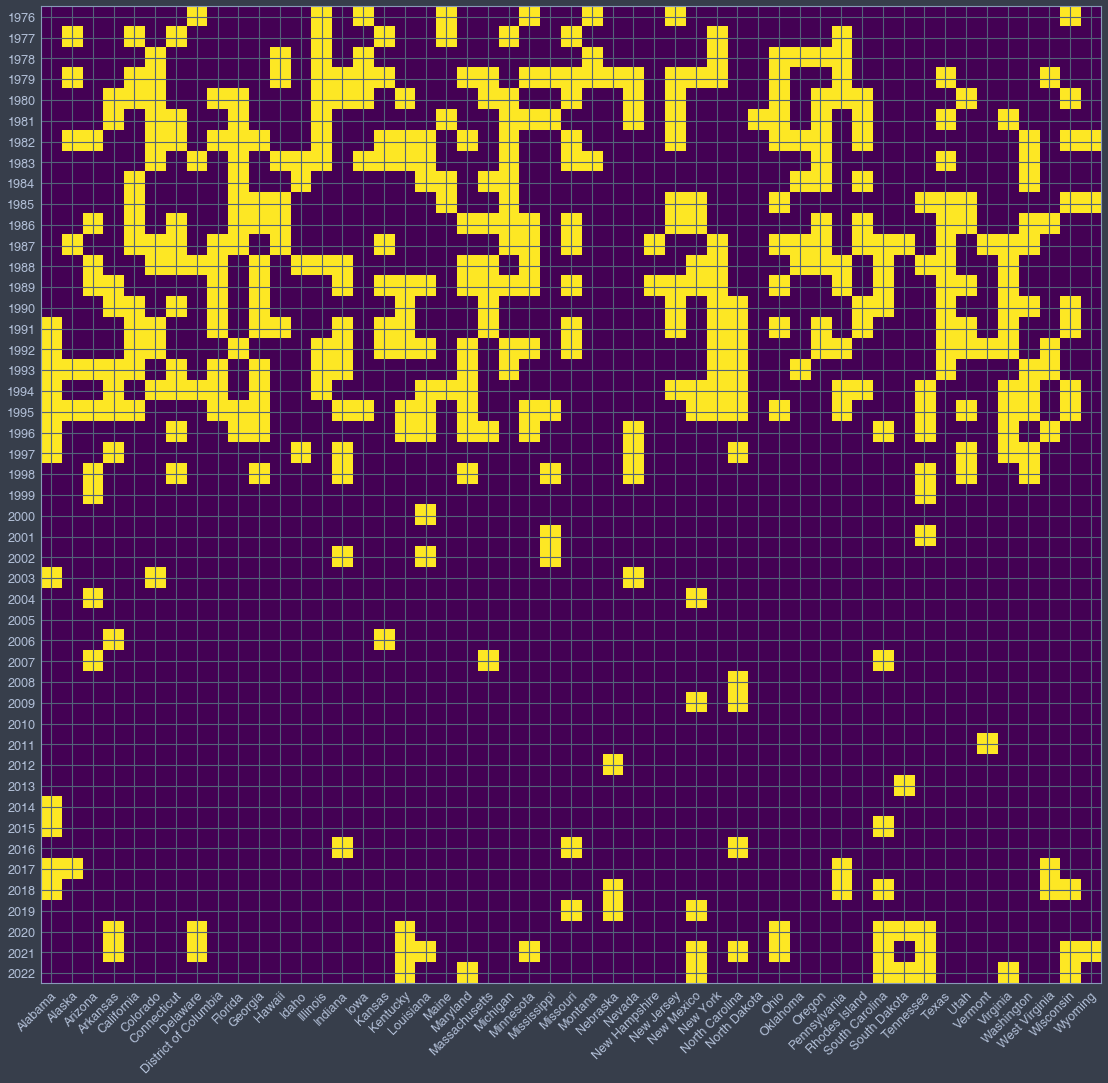

In [29]:
fig, ax = plt.subplots(figsize=(19, 19))
im = ax.imshow(year_state_vis)
ax.set_xticks(np.arange(len(year_state_vis.columns.to_list())))
ax.set_yticks(np.arange(len(year_state_vis.index.to_list())))
ax.set_xticklabels(year_state_vis.columns.to_list())
ax.set_yticklabels(year_state_vis.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

## Weapons and Circumstance Pattern

In [7]:
weapon_circum = map_data[map_data['Solved']=='Yes'].groupby(['Weapon', 'Circumstance']).count()['CNTYFIPS'].to_frame()
weapon_circum = pd.pivot_table(weapon_circum, index='Weapon', columns='Circumstance', values='CNTYFIPS')
weapon_circum.fillna(0, inplace=True)

weapon_circum.head()

Circumstance,Abortion,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,1.0,304.0,39.0,34.0,74.0,22.0,28.0,54.0,41.0,0.0,...,1565.0,203.0,639.0,0.0,28.0,8.0,102.0,219.0,0.0,0.0
"Blunt object - hammer, club, etc",0.0,151.0,249.0,779.0,37.0,767.0,167.0,477.0,132.0,0.0,...,4437.0,901.0,8709.0,5.0,137.0,23.0,334.0,3073.0,1.0,1.0
Drowning,0.0,248.0,16.0,8.0,0.0,10.0,2.0,6.0,9.0,0.0,...,582.0,68.0,114.0,1.0,7.0,3.0,17.0,27.0,1.0,0.0
Explosives,0.0,24.0,7.0,3.0,28.0,1.0,1.0,1.0,0.0,0.0,...,237.0,35.0,44.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0
Fire,0.0,291.0,37.0,30.0,2589.0,36.0,1.0,48.0,3.0,3.0,...,728.0,286.0,693.0,6.0,7.0,6.0,11.0,67.0,0.0,0.0


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
def make_it_min_max(df):
    min_max_ = pd.DataFrame(index=df.index, columns=df.columns)

    for i in range(len(df.index)):
        min_max_.iloc[i] = min_max_scaler.fit_transform(df.iloc[i].to_frame())[:, 0]
    
    return min_max_

In [7]:
min_max_w_c = make_it_min_max(weapon_circum)
min_max_w_c.head()

Circumstance,Abortion,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,0.000639,0.194249,0.02492,0.021725,0.047284,0.014058,0.017891,0.034505,0.026198,0.0,...,1.0,0.129712,0.408307,0.0,0.017891,0.005112,0.065176,0.139936,0.0,0.0
"Blunt object - hammer, club, etc",0.0,0.017338,0.028591,0.089448,0.004248,0.08807,0.019176,0.054771,0.015157,0.0,...,0.509473,0.103456,1.0,0.000574,0.015731,0.002641,0.038351,0.352853,0.000115,0.000115
Drowning,0.0,0.426117,0.027491,0.013746,0.0,0.017182,0.003436,0.010309,0.015464,0.0,...,1.0,0.116838,0.195876,0.001718,0.012027,0.005155,0.02921,0.046392,0.001718,0.0
Explosives,0.0,0.101266,0.029536,0.012658,0.118143,0.004219,0.004219,0.004219,0.0,0.0,...,1.0,0.147679,0.185654,0.0,0.004219,0.0,0.0,0.021097,0.0,0.0
Fire,0.0,0.112399,0.014291,0.011587,1.0,0.013905,0.000386,0.01854,0.001159,0.001159,...,0.28119,0.110467,0.267671,0.002317,0.002704,0.002317,0.004249,0.025879,0.0,0.0


In [8]:
unsolved_weapon_circum = map_data[map_data['Solved']=='No'].groupby(['Weapon', 'Circumstance']).count()['CNTYFIPS'].to_frame()
unsolved_weapon_circum = pd.pivot_table(unsolved_weapon_circum, index='Weapon', columns='Circumstance', values='CNTYFIPS')
unsolved_weapon_circum.fillna(0, inplace=True)

unsolved_weapon_circum.head()

Circumstance,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,Circumstances undetermined,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,16.0,59.0,2.0,57.0,0.0,0.0,43.0,1.0,0.0,628.0,...,145.0,27.0,22.0,0.0,17.0,2.0,48.0,126.0,0.0,0.0
"Blunt object - hammer, club, etc",6.0,733.0,37.0,16.0,53.0,31.0,278.0,0.0,0.0,6225.0,...,745.0,326.0,629.0,0.0,36.0,17.0,177.0,1463.0,0.0,0.0
Drowning,5.0,41.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,119.0,...,48.0,5.0,9.0,0.0,2.0,0.0,8.0,18.0,0.0,0.0
Explosives,2.0,17.0,3.0,27.0,0.0,0.0,0.0,0.0,0.0,76.0,...,28.0,19.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Fire,26.0,66.0,0.0,1497.0,1.0,2.0,3.0,0.0,0.0,690.0,...,121.0,76.0,39.0,0.0,1.0,0.0,6.0,26.0,0.0,0.0


In [9]:
unsolved_min_max_w_c = make_it_min_max(unsolved_weapon_circum)
unsolved_min_max_w_c.head()

Circumstance,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,Circumstances undetermined,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,0.025478,0.093949,0.003185,0.090764,0.0,0.0,0.068471,0.001592,0.0,1.0,...,0.230892,0.042994,0.035032,0.0,0.02707,0.003185,0.076433,0.200637,0.0,0.0
"Blunt object - hammer, club, etc",0.000964,0.117751,0.005944,0.00257,0.008514,0.00498,0.044659,0.0,0.0,1.0,...,0.119679,0.052369,0.101044,0.0,0.005783,0.002731,0.028434,0.23502,0.0,0.0
Drowning,0.042017,0.344538,0.0,0.0,0.0,0.0,0.033613,0.0,0.0,1.0,...,0.403361,0.042017,0.07563,0.0,0.016807,0.0,0.067227,0.151261,0.0,0.0
Explosives,0.026316,0.223684,0.039474,0.355263,0.0,0.0,0.0,0.0,0.0,1.0,...,0.368421,0.25,0.039474,0.0,0.0,0.0,0.0,0.013158,0.0,0.0
Fire,0.017368,0.044088,0.0,1.0,0.000668,0.001336,0.002004,0.0,0.0,0.460922,...,0.080828,0.050768,0.026052,0.0,0.000668,0.0,0.004008,0.017368,0.0,0.0


In [10]:
states = map_data['State'].to_list()

In [11]:
states[12]

'Alabama'

In [22]:
solved_df = map_data[(map_data['Solved']=='Yes')
                     & (map_data['State']==states[12])].groupby(['Weapon', 'Circumstance']).count()['CNTYFIPS'].to_frame()
solved_df = pd.pivot_table(solved_df,
                           index='Weapon',
                           columns='Circumstance',
                           values='CNTYFIPS')
solved_df.fillna(0, inplace=True)

solved_df.head()

Circumstance,Abortion,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,5.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
"Blunt object - hammer, club, etc",0.0,0.0,3.0,11.0,0.0,8.0,0.0,9.0,1.0,0.0,...,58.0,14.0,107.0,0.0,0.0,0.0,4.0,37.0,0.0,0.0
Drowning,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Explosives,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fire,0.0,1.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,7.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
unsolved_df = map_data[(map_data['Solved']=='No')
                       & (map_data['State']==states[12])].groupby(['Weapon', 'Circumstance']).count()['CNTYFIPS'].to_frame()
unsolved_df = pd.pivot_table(unsolved_df,
                             index='Weapon',
                             columns='Circumstance',
                             values='CNTYFIPS')
unsolved_df.fillna(0, inplace=True)

unsolved_df.head()

Circumstance,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Circumstances undetermined,Felon killed by police,Felon killed by private citizen,...,Motor vehicle theft,Narcotic drug laws,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Rape,Robbery,Sniper attack
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
"Blunt object - hammer, club, etc",0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,0.0,0.0,...,0.0,0.0,6.0,1.0,2.0,0.0,0.0,0.0,14.0,0.0
Drowning,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Fire,0.0,0.0,8.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
min_max_unsolved_df = make_it_min_max(unsolved_df)
min_max_unsolved_df.head()

Circumstance,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Circumstances undetermined,Felon killed by police,Felon killed by private citizen,...,Motor vehicle theft,Narcotic drug laws,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Rape,Robbery,Sniper attack
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0
"Blunt object - hammer, club, etc",0.0,0.0,0.0,0.0,0.0,0.022222,0.0,1.0,0.0,0.0,...,0.0,0.0,0.133333,0.022222,0.044444,0.0,0.0,0.0,0.311111,0.0
Drowning,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Fire,0.0,0.0,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
min_max_solved_df = make_it_min_max(solved_df)
min_max_solved_df.head()

Circumstance,Abortion,All other manslaughter by negligence,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Children playing with gun,...,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Prostitution and commercialized vice,Rape,Robbery,Sniper attack,Victim shot in hunting accident
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,...,1.0,0.833333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
"Blunt object - hammer, club, etc",0.0,0.0,0.028037,0.102804,0.0,0.074766,0.0,0.084112,0.009346,0.0,...,0.542056,0.130841,1.0,0.0,0.0,0.0,0.037383,0.345794,0.0,0.0
Drowning,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.125,0.0,0.0
Explosives,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fire,0.0,0.055556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.388889,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
set(solved_df.columns.to_list()) - set(unsolved_df.columns.to_list())

{'Abortion',
 'All other manslaughter by negligence',
 'Children playing with gun',
 'Gun-cleaning death - other than self',
 'Institutional killings',
 'Prostitution and commercialized vice',
 'Victim shot in hunting accident'}

In [60]:
min_max_unsolved_df / min_max_solved_df.loc[min_max_unsolved_df.index][min_max_unsolved_df.columns]

Circumstance,All suspected felony type,Argument over money or property,Arson,Brawl due to influence of alcohol,Brawl due to influence of narcotics,Burglary,Child killed by babysitter,Circumstances undetermined,Felon killed by police,Felon killed by private citizen,...,Motor vehicle theft,Narcotic drug laws,Other,Other - not specified,Other arguments,Other negligent handling of gun,Other sex offense,Rape,Robbery,Sniper attack
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,inf,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.400000,0.000000,NaN,NaN,0.000000,inf,NaN
"Blunt object - hammer, club, etc",0.000000,0.000000,NaN,0.000000,NaN,0.264198,0.000000,3.451613,NaN,0.000000,...,NaN,0.000000,0.245977,0.169841,0.044444,NaN,NaN,0.000000,0.899700,NaN
Drowning,inf,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
Explosives,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,...,NaN,NaN,1.000000,inf,NaN,NaN,NaN,NaN,NaN,NaN
Fire,NaN,NaN,0.888889,NaN,NaN,NaN,NaN,1.636364,NaN,NaN,...,NaN,NaN,0.000000,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN
"Firearm, type not stated",inf,0.034720,inf,0.121521,0.000000,1.093686,NaN,1.000000,0.312482,0.145825,...,0.182281,0.224346,0.561509,0.609340,0.116660,0.000000,NaN,0.729124,0.611524,NaN
"Handgun - pistol, revolver, etc",1.640254,0.032974,0.000000,0.061986,0.133271,0.953937,0.000000,1.492512,0.157950,0.183426,...,inf,0.442068,0.316895,1.048094,0.146593,0.096924,0.000000,0.112228,0.782405,1.421553
Knife or cutting instrument,5.244681,0.171957,NaN,0.000000,0.000000,4.661939,NaN,2.874636,0.000000,0.874113,...,NaN,0.308511,0.613413,1.605515,0.207447,NaN,0.000000,0.874113,2.409718,NaN
"Narcotics or drugs, sleeping pills",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN


In [50]:
min_max_unsolved_df = min_max_unsolved_df.astype('float')

<AxesSubplot:xlabel='Circumstance', ylabel='Weapon'>

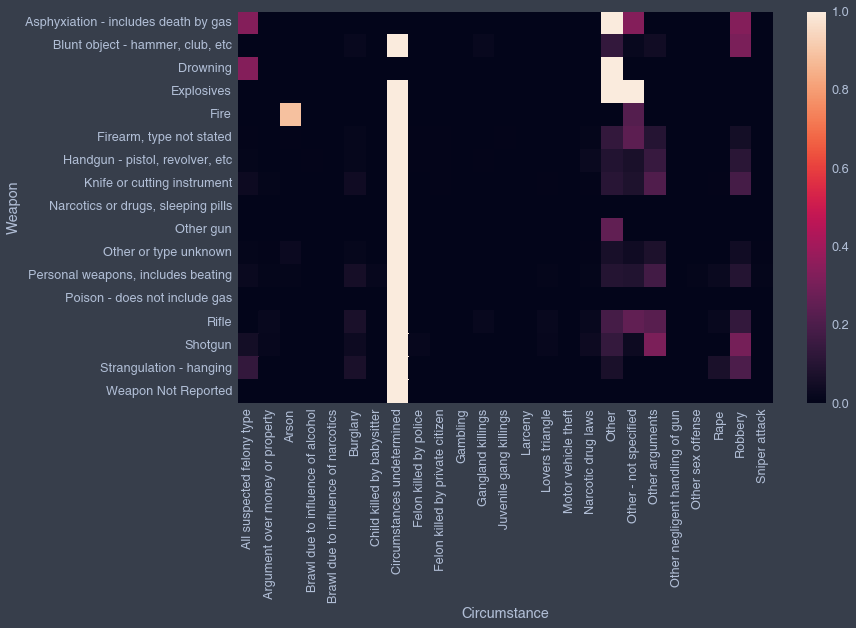

In [54]:
sns.heatmap(min_max_unsolved_df)

In [55]:
min_max_solved_df = min_max_solved_df.astype('float')

<AxesSubplot:xlabel='Circumstance', ylabel='Weapon'>

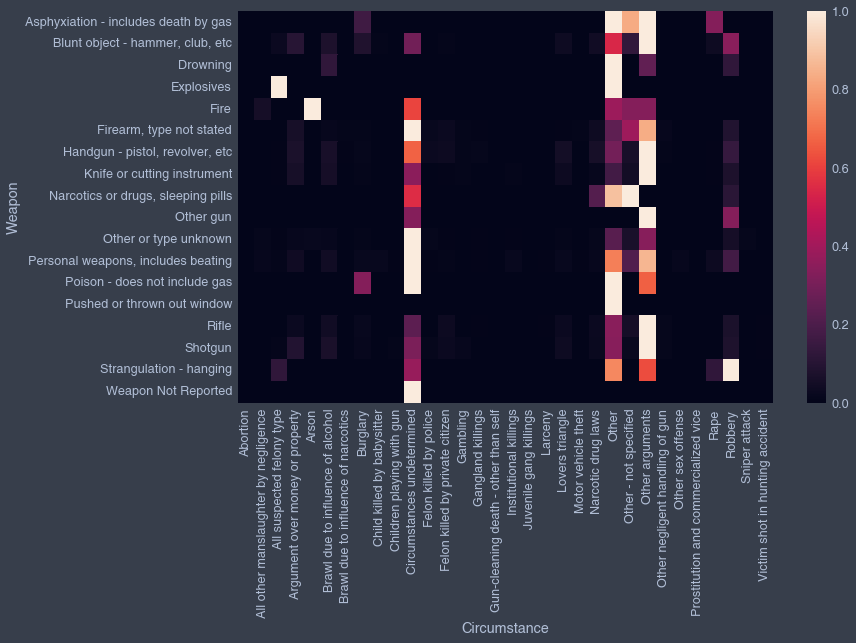

In [56]:
sns.heatmap(min_max_solved_df)

In [11]:
w = map_data[map_data['Solved']=='Yes'].groupby(['State', 'Year', 'Weapon', 'Circumstance']).count()['CNTYFIPS'].to_frame()
w

CNTYFIPS
State   Year Weapon                             Circumstance                                  
Alabama 1976 Blunt object - hammer, club, etc   All suspected felony type                    1
                                                Other                                        3
                                                Other arguments                              3
                                                Robbery                                      1
             Drowning                           Other                                        1
...                                                                                        ...
Wyoming 2022 Knife or cutting instrument        Circumstances undetermined                   1
                                                Other arguments                              2
             Narcotics or drugs, sleeping pills All other manslaughter by negligence         2
             Other or type unknown              Other                                        2
             Rifle                              Felon killed by police                       2

[106417 rows x 1 columns]

In [15]:
w.loc['Alabama']

CNTYFIPS
Year Weapon                           Circumstance                        
1976 Blunt object - hammer, club, etc All suspected felony type          1
                                      Other                              3
                                      Other arguments                    3
                                      Robbery                            1
     Drowning                         Other                              1
...                                                                    ...
2022 Rifle                            Robbery                            1
     Shotgun                          Circumstances undetermined         3
                                      Other                              3
                                      Other arguments                    4
     Weapon Not Reported              Circumstances undetermined         7

[1975 rows x 1 columns]

In [18]:
alabama = pd.pivot_table(w.loc['Alabama'],
                         index='Year',
                         columns=['Weapon', 'Circumstance'],
                         values='CNTYFIPS')

alabama.fillna(0, inplace=True)
alabama

Weapon       Asphyxiation - includes death by gas                              \
Circumstance                             Burglary Other Other - not specified   
Year                                                                            
1976                                          0.0   0.0                   0.0   
1977                                          0.0   2.0                   0.0   
1978                                          0.0   0.0                   0.0   
1979                                          0.0   1.0                   0.0   
1980                                          0.0   0.0                   0.0   
1981                                          0.0   0.0                   0.0   
1982                                          0.0   0.0                   0.0   
1983                                          0.0   1.0                   0.0   
1984                                          0.0   1.0                   0.0   
1985                                          0.0   0.0                   0.0   
1986                                          0.0   0.0                   0.0   
1987                                          0.0   0.0                   0.0   
1988                                          0.0   0.0                   0.0   
1989                                          0.0   0.0                   0.0   
1990                                          0.0   0.0                   0.0   
1991                                          0.0   0.0                   0.0   
1992                                          0.0   0.0                   0.0   
1993                                          0.0   0.0                   0.0   
1994                                          0.0   0.0                   0.0   
1995                                          0.0   1.0                   0.0   
1996                                          0.0   0.0                   0.0   
1997                                          0.0   0.0                   0.0   
1998                                          0.0   0.0                   0.0   
1999                                          0.0   0.0                   0.0   
2000                                          0.0   0.0                   0.0   
2001                                          0.0   0.0                   0.0   
2002                                          0.0   0.0                   0.0   
2003                                          0.0   0.0                   0.0   
2004                                          0.0   0.0                   0.0   
2005                                          0.0   0.0                   0.0   
2006                                          0.0   0.0                   0.0   
2007                                          0.0   0.0                   0.0   
2008                                          0.0   0.0                   0.0   
2009                                          0.0   0.0                   0.0   
2010                                          0.0   0.0                   0.0   
2011                                          0.0   0.0                   0.0   
2012                                          0.0   0.0                   2.0   
2013                                          1.0   0.0                   0.0   
2014                                          0.0   0.0                   1.0   
2015                                          0.0   0.0                   0.0   
2016                                          0.0   0.0                   1.0   
2017                                          0.0   0.0                   0.0   
2018                                          0.0   0.0                   1.0   
2019                                          0.0   0.0                   0.0   
2020                                          0.0   0.0                   0.0   
2021                                          0.0   0.0                   0.0   
2022                           

In [29]:
alabama.columns = alabama.columns.get_level_values(0)

In [31]:
alabama

Weapon,Asphyxiation - includes death by gas,Asphyxiation - includes death by gas,Asphyxiation - includes death by gas,Asphyxiation - includes death by gas,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc","Blunt object - hammer, club, etc","Blunt object - hammer, club, etc","Blunt object - hammer, club, etc","Blunt object - hammer, club, etc",...,Shotgun,Shotgun,Shotgun,Strangulation - hanging,Strangulation - hanging,Strangulation - hanging,Strangulation - hanging,Strangulation - hanging,Strangulation - hanging,Weapon Not Reported
Year,,,,,,,,,,,,,,,,,,,,,
1976,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
1977,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
1978,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
1979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1980,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1983,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:xlabel='Weapon', ylabel='Year'>

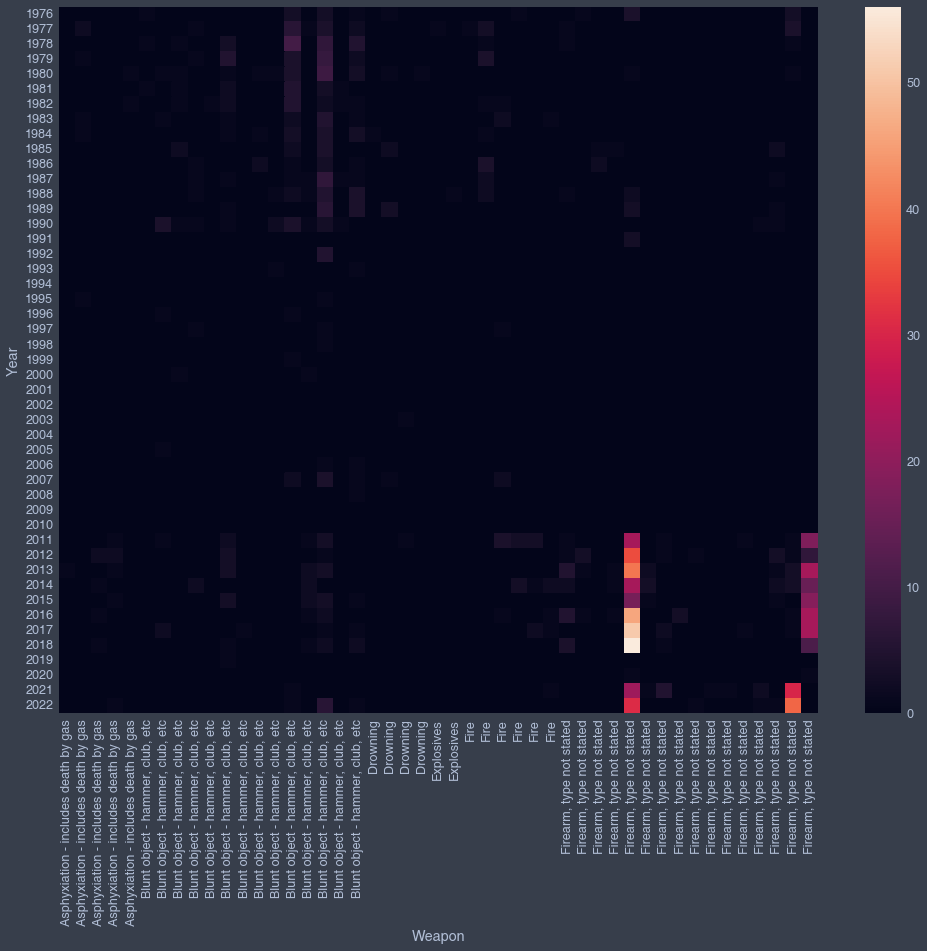

In [43]:
fig, ax = plt.subplots(1, figsize=(17, 13))
sns.heatmap(alabama.iloc[:47, :47], xticklabels=alabama.iloc[:47, :47].columns, ax=ax)